# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

2025-10-21 10:27:47.947857: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-21 10:27:47.990893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-21 10:27:49.204496: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [2]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[['x0', 'x1']].values
y_train = train['y'].values
X_test = test[['x0', 'x1']].values
y_test = test['y'].values

In [3]:
from sklearn.preprocessing import StandardScaler

# Normalize training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

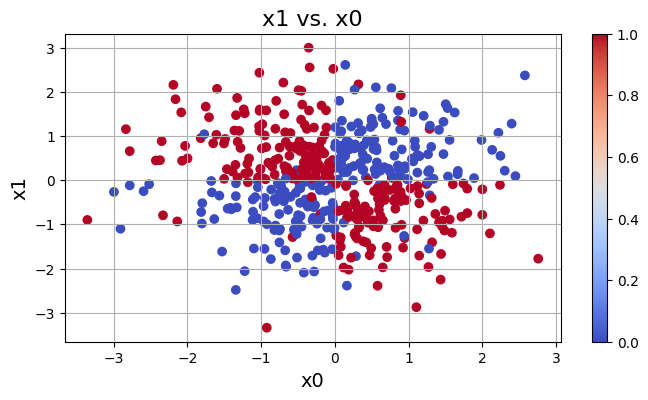

In [4]:
plt.figure(figsize=(8, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [30]:
# Learning rate scheduler with warmup and cosine decay

class WarmupCosineScheduler(tf.keras.callbacks.Callback):
    def __init__(self, base_lr, total_epochs, warmup_epochs=5):
        super().__init__()
        self.base_lr = base_lr
        self.total_epochs = total_epochs
        self.warmup_epochs = warmup_epochs
        self.lr_history = []
    
    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.warmup_epochs:
            lr = self.base_lr * (epoch + 1) / self.warmup_epochs
        else:
            progress = (epoch - self.warmup_epochs) / (self.total_epochs - self.warmup_epochs)
            lr = 0.5 * self.base_lr * (1 + np.cos(np.pi * progress))
        
        self.model.optimizer.learning_rate = lr
        self.lr_history.append(lr)
        print(f"\nEpoch {epoch+1}: Learning rate is {lr:.6f}.")


Epoch 1/50


2025-10-21 10:39:47.713359: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7880 - loss: 0.6453 - val_accuracy: 0.8400 - val_loss: 0.6089
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8460 - loss: 0.5726 - val_accuracy: 0.8620 - val_loss: 0.5347
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8920 - loss: 0.4936 - val_accuracy: 0.8760 - val_loss: 0.4582
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9120 - loss: 0.4187 - val_accuracy: 0.8920 - val_loss: 0.3965
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.3660 - val_accuracy: 0.9080 - val_loss: 0.3610
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.3372 - val_accuracy: 0.9140 - val_loss: 0.3437
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.3225 - val_accuracy: 0.9140 - val_loss: 0.3360
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9420 - loss: 0.3145 - val_accuracy: 0.9180 - val_loss: 0.3312
Epo

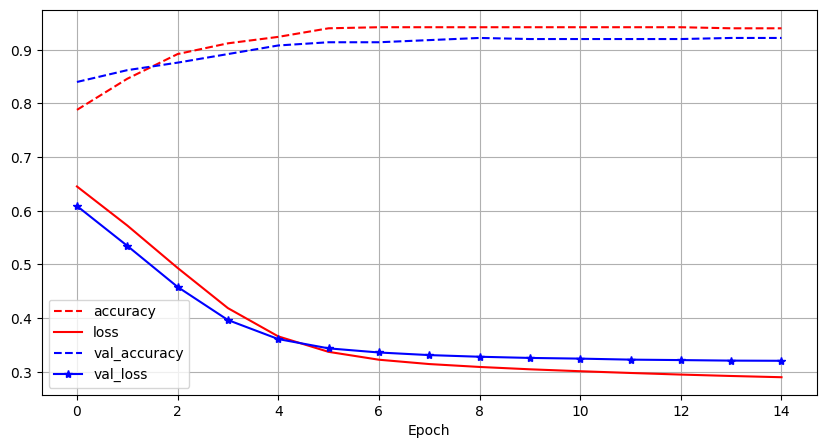

Final validation accuracy: 0.9220


In [5]:
# Neural network with Adam optimizer and early stopping

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])

pd.DataFrame(history.history).plot(
    figsize=(10, 5), grid=True, xlabel='Epoch',
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

final_val_acc = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_acc:.4f}")

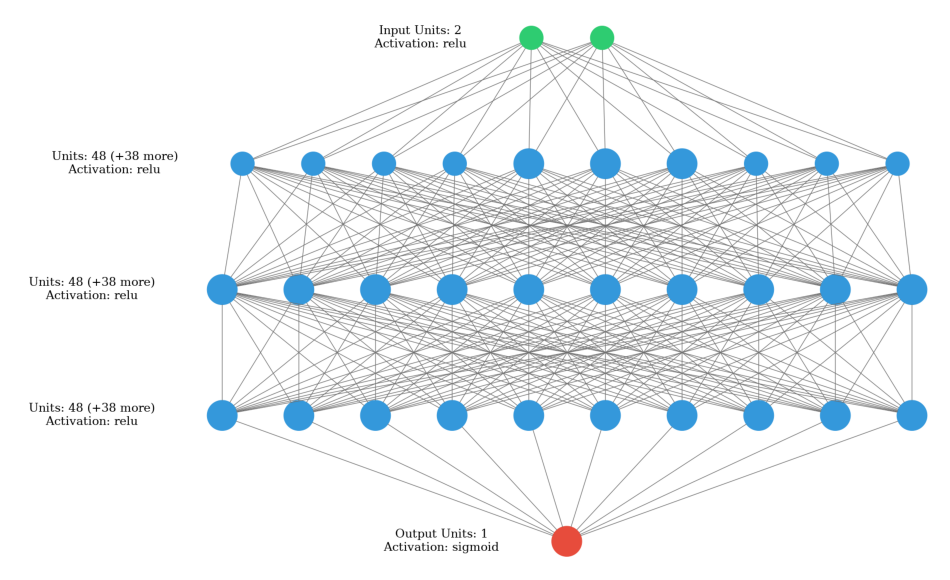

In [ ]:
import matplotlib.image as mpimg

from keras_visualizer import visualizer

# Model architecture visualization
visualizer(model, file_name='model_visual', file_format='png', view=False)

img = mpimg.imread('model_visual.png')
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

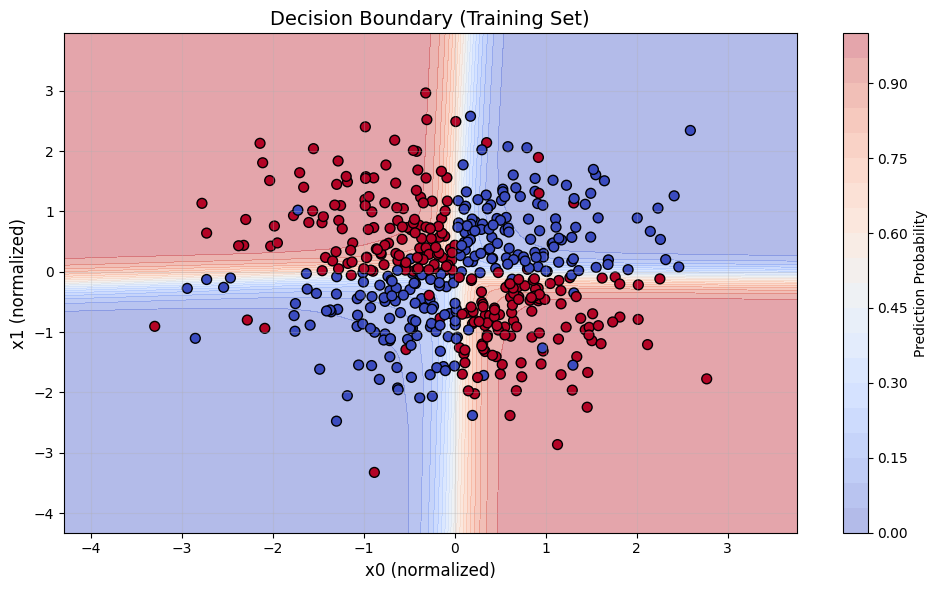

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=20)
    plt.colorbar(label='Prediction Probability')
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, 
                         cmap='coolwarm', edgecolors='k', s=50)
    plt.xlabel('x0 (normalized)', fontsize=12)
    plt.ylabel('x1 (normalized)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(model, X_train, y_train, "Decision Boundary (Training Set)")


Epoch 1: Learning rate is 0.006667.
Epoch 1/50


/home/vegardhoug/NTNU/5H25/TDT4172_Introduction_machine_learning/TDT4172/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.4820 - loss: 0.8690 - val_accuracy: 0.5320 - val_loss: 0.7704

Epoch 2: Learning rate is 0.013333.
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5200 - loss: 0.8263 - val_accuracy: 0.5360 - val_loss: 0.6951

Epoch 3: Learning rate is 0.020000.
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5180 - loss: 0.7758 - val_accuracy: 0.5980 - val_loss: 0.6289

Epoch 4: Learning rate is 0.026667.
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5380 - loss: 0.7297 - val_accuracy: 0.6940 - val_loss: 0.5648

Epoch 5: Learning rate is 0.033333.
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6400 - loss: 0.6536 - val_accuracy: 0.7280 - val_loss: 0.5165

Epoch 6: Learning rate is 0.040000.
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6520 - loss: 0.6072 - val_accuracy: 0.8160 - val_loss: 0.4735

Epoch 7: Learning rate is 0.046667.
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

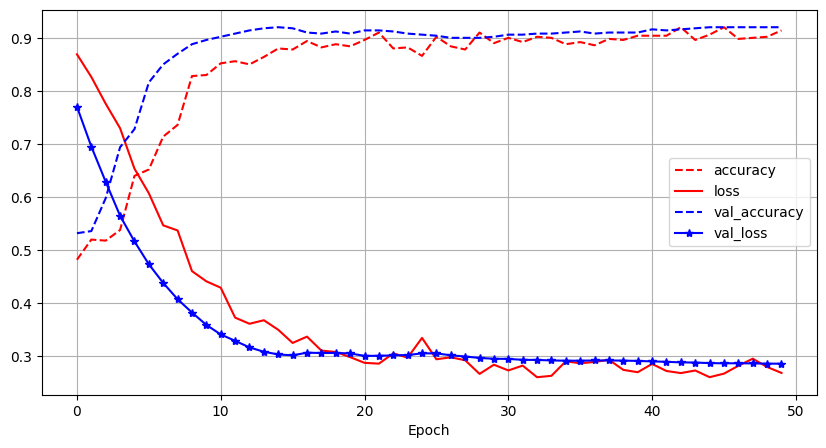

Final validation accuracy: 0.9200


In [36]:
# Neural network with SGD, batch normalization, and dropout

tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(2,), use_bias=False,
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(256, use_bias=False,
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(128, use_bias=False,
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, use_bias=False,
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(
                learning_rate=0.1, 
                momentum=0.9, 
                nesterov=True
            ),
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 50
scheduler = WarmupCosineScheduler(base_lr=0.1, total_epochs=epochs, warmup_epochs=15)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=256, validation_data=(X_test, y_test), callbacks=[scheduler])

pd.DataFrame(history.history).plot(
    figsize=(10, 5), grid=True, xlabel='Epoch',
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

final_val_acc = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_acc:.4f}")

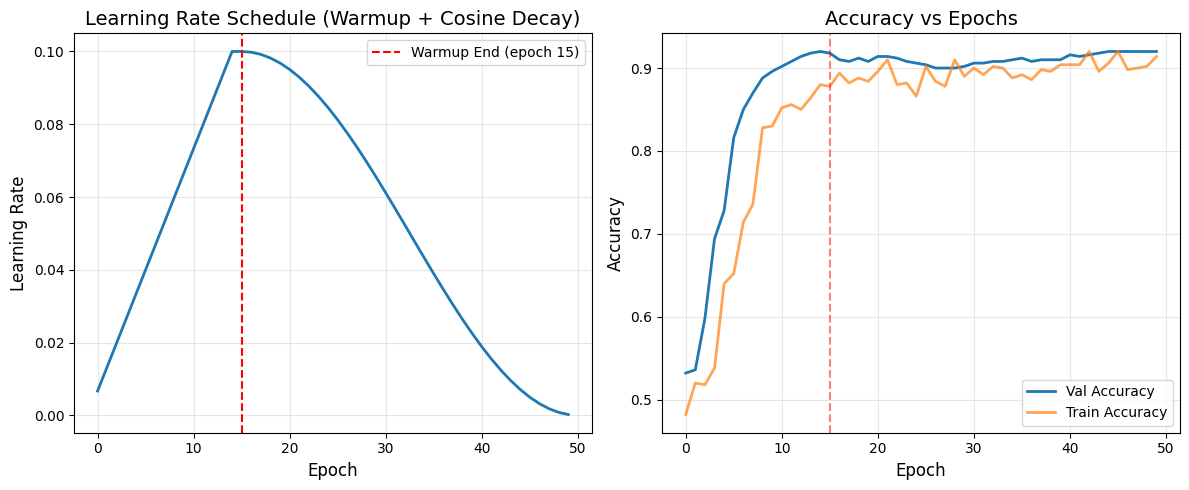

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(scheduler.lr_history, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.title('Learning Rate Schedule (Warmup + Cosine Decay)', fontsize=14)
plt.grid(True, alpha=0.3)

warmup_end = 15
plt.axvline(x=warmup_end, color='red', linestyle='--', 
            label=f'Warmup End (epoch {warmup_end})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], linewidth=2, label='Val Accuracy')
plt.plot(history.history['accuracy'], linewidth=2, alpha=0.7, label='Train Accuracy')
plt.axvline(x=warmup_end, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Epochs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Discussion

- To make sure the results are reproducable, I have set random seeds before model creation.
- Network architecture visualization and decision boundary plot can be found above.
- I chose the Adam optimizer first, and tried later to see if I could get the same performance using SGD, which proved to be more difficult and time consuming for this specific task. The two optimizers differs when it comes to the update rule for the gradient descent, SGD updates using the classical gradient descent rule $\theta_{t+1} = \theta_t - \eta \nabla_{\theta}L(\theta_t)$, whereas Adam adapt the learning rate for each parameter using the mean and variance of past gradients. Additionally, SGD uses a fixed learning rate by default (which is why we implemented the learning rate scheduler for this optimizer), but Adam handles this using adaptive learning rates. Adam also performs well with minimal hyperparameter tuning, in contrast to SGD which required more tuning (which I noticed when using them).
- In the warmup phase, the learning rate is increased gradually, before the cosine dacay smoothly reduces it for the remaining epochs to allow fine tuning near the convergence. The learning rate scheduler for the model with SGD improved the performance well.


In [12]:
# Ablation study

tf.random.set_seed(42)
ablation_results = []

# Configuration 1: No early stopping
model_no_early_stopping = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_no_early_stopping.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_no_early_stopping = model_no_early_stopping.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Configuration 2: Shallow network
model_shallow = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_shallow.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_shallow = model_shallow.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

ablation_results = pd.DataFrame({
    'Configuration': ['Baseline', 'No Early Stopping', 'Shallow Network'],
    'Train Accuracy': [history.history['accuracy'][-1], 
                                history_no_early_stopping.history['accuracy'][-1], 
                                history_shallow.history['accuracy'][-1]
    ],
    'Val Accuracy': [history.history['val_accuracy'][-1], 
                                  history_no_early_stopping.history['val_accuracy'][-1], 
                                  history_shallow.history['val_accuracy'][-1]
    ],
})

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6840 - loss: 0.6642 - val_accuracy: 0.7780 - val_loss: 0.6220
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - loss: 0.5907 - val_accuracy: 0.8480 - val_loss: 0.5513
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8820 - loss: 0.5133 - val_accuracy: 0.8800 - val_loss: 0.4736
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9080 - loss: 0.4365 - val_accuracy: 0.8940 - val_loss: 0.4076
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9180 - loss: 0.3790 - val_accuracy: 0.9040 - val_loss: 0.3678
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9300 - loss: 0.3463 - val_accuracy: 0.9120 - val_loss: 0.3490
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9340 - loss: 0.3301 - val_accuracy: 0.9160 - val_loss: 0.3401
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9360 - loss: 0.3219 - val_accuracy: 0.9180 - val_loss

| Configuration     |   Train Accuracy |   Val Accuracy |
|:------------------|-----------------:|---------------:|
| Baseline          |            0.94  |          0.922 |
| No Early Stopping |            0.942 |          0.914 |
| Shallow Network   |            0.908 |          0.88  |


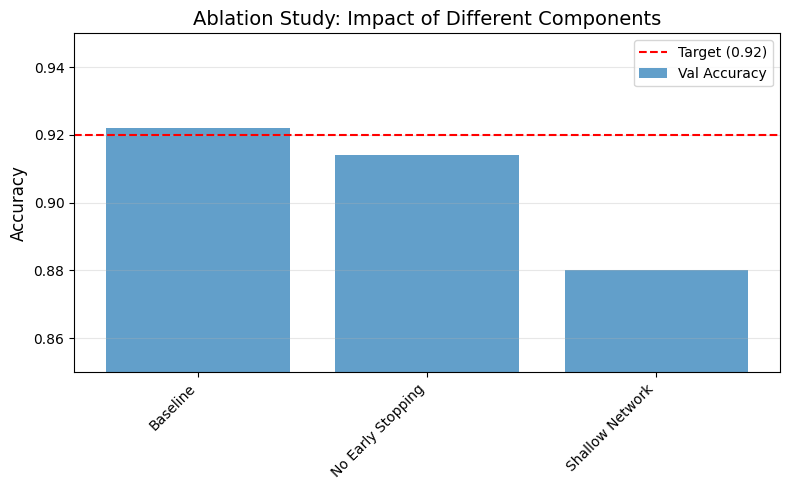

In [14]:
print(ablation_results.to_markdown(index=False))

plt.figure(figsize=(8, 5))
x = np.arange(len(ablation_results))
plt.bar(x, ablation_results['Val Accuracy'], alpha=0.7, label='Val Accuracy')
plt.xticks(x, ablation_results['Configuration'], rotation=45, ha='right')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Ablation Study: Impact of Different Components', fontsize=14)
plt.axhline(y=0.92, color='r', linestyle='--', label='Target (0.92)')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0.85, 0.95)
plt.tight_layout()
plt.show()

- Based on the ablation study above conducted on the model with Adam optimizer, we can clearly see that the network architecture had the biggest impact on the validation accuracy. The early stopping also had an important impact because it prevented the model to continue training when it had converged.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [ ]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [5]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


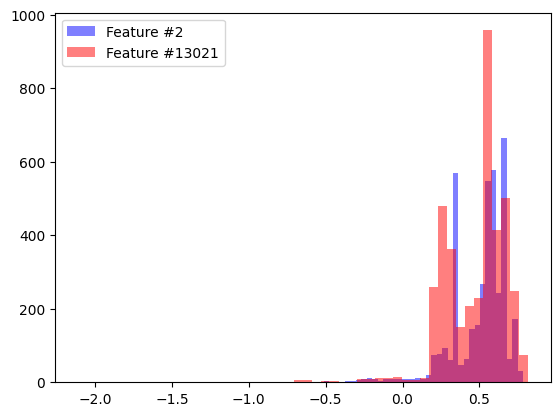

In [6]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [7]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7



---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [8]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [9]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [10]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [11]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)